# Sectoral analysis

Script to run basic analysis of the role of reservoirs in AWASH

#### Initialization of the model

In [1]:
cd("../../src")
include("nui.jl")

┌──────────────────────────────────────────────────┐
│    ▄▄    ▄▄      ▄▄    ▄▄       ▄▄▄▄    ▄▄    ▄▄ │
│   ████   ██      ██   ████    ▄█▀▀▀▀█   ██    ██ │
│   ████   ▀█▄ ██ ▄█▀   ████    ██▄       ██    ██ │
│  ██  ██   ██ ██ ██   ██  ██    ▀████▄   ████████ │
│  ██████   ███▀▀███   ██████        ▀██  ██    ██ │
│ ▄██  ██▄  ███  ███  ▄██  ██▄  █▄▄▄▄▄█▀  ██    ██ │
│ ▀▀    ▀▀  ▀▀▀  ▀▀▀  ▀▀    ▀▀   ▀▀▀▀▀    ▀▀    ▀▀ │
└──────────────────────────────────────────────────┘

Welcome to AWASH, the America's Water Model, version 0.9.



In [2]:
Pkg.rm("Nulls")
config = readconfig("../configs/standard-10year.yml");

INFO: Package Nulls is not installed


#### Computation of the water deficits

In [22]:
#include("optimize-surface.jl");
Pkg.rm("RCall")
Pkg.rm("Nulls")

include("simulate.jl")

INFO: Removing AxisArrays v0.2.1
INFO: Removing IntervalSets v0.1.1
INFO: Removing Nulls v0.1.2
INFO: Removing RCall v0.8.1
INFO: Removing RangeArrays v0.2.0
INFO: Package database updated


Loading from saved region network...


INFO: Package Nulls is not installed


Loading from saved water network...


Loading from saved region network...
Loading from saved region network...


Loading from saved region network...
Creating model...


agriculture/edds/barley-gdd.csv
agriculture/edds/barley-kdd.csv
agriculture/edds/corn-gdd.csv
agriculture/edds/maize-gdd.csv
agriculture/edds/corn-kdd.csv
agriculture/edds/maize-kdd.csv
agriculture/edds/sorghum-gdd.csv
agriculture/edds/sorghum-kdd.csv
agriculture/edds/soybeans-gdd.csv
agriculture/edds/soybeans-kdd.csv
agriculture/edds/wheat-gdd.csv
agriculture/edds/wheat-kdd.csv
agriculture/edds/hay-gdd.csv
agriculture/edds/otherhay-gdd.csv
agriculture/edds/hay-kdd.csv
agriculture/edds/otherhay-kdd.csv


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] start at ./deprecated.jl:986 [inlined]
 [3] initagriculture(::Mimi.Model) at /home/laureline/AW-julia/awash/src/Agriculture.jl:68
 [4] include_from_node1(::String) at ./loading.jl:576
 [5] include(::String) at ./sysimg.jl:14
 [6] include_from_node1(::String) at ./loading.jl:576
 [7] include(::String) at ./sysimg.jl:14
 [8] include_from_node1(::String) at ./loading.jl:576
 [9] include(::String) at ./sysimg.jl:14
 [10] include_string(::String, ::String) at ./loading.jl:522
 [11] include_string(::Module, ::String, ::String) at /home/laureline/.julia/v0.6/Compat/src/Compat.jl:71
 [12] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/laureline/.julia/v0.6/IJulia/src/execute_request.jl:158
 [13] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/laureline/.julia/v0.6/Compat/src/Compat.jl:385
 [14] eventloop(::ZMQ.Socket) at /home/laureline/.julia/v0.6/IJulia/src/eventlo

Loading saved groundwater model...


LoadError: LoadError: LoadError: [91mMismatched data size for a parameter connection. Component: Allocation, Parameter: withdrawals[39m
while loading /home/laureline/AW-julia/awash/src/model.jl, in expression starting on line 19
while loading /home/laureline/AW-julia/awash/src/simulate.jl, in expression starting on line 10

In [23]:
failure = model[:Allocation, :balance]

LoadError: [91mNullException()[39m

In [7]:
f_ag = failure .* model[:WaterDemand, :totalirrigation]/model[:WaterDemand, :totaldemand]
f_do = failure .* model[:WaterDemand, :domesticuse]/model[:WaterDemand, :totaldemand]
f_in = failure .* model[:WaterDemand, :industrialuse]/model[:WaterDemand, :totaldemand]
f_ur = failure .* model[:WaterDemand, :urbanuse]/model[:WaterDemand, :totaldemand]
f_th = failure .* model[:WaterDemand, :thermoelectricuse]/model[:WaterDemand, :totaldemand]
f_ls = failure .* model[:WaterDemand, :livestockuse]/model[:WaterDemand, :totaldemand]

3109×3109 Array{Float64,2}:
 -0.00694902   -0.0065291    -0.0018959    …  -0.00613793   -0.000448293
  0.00971435    0.00912733    0.00265036       0.00858049    0.00062669 
 -0.0280787    -0.026382     -0.00766071      -0.0248014    -0.00181141 
 -0.0056479    -0.0053066    -0.00154091      -0.00498868   -0.000364356
 -0.0819164    -0.0769663    -0.0223492       -0.0723551    -0.00528457 
  8.74288e-6    8.21456e-6    2.38532e-6   …   7.72241e-6    5.64018e-7 
 -0.00189689   -0.00178227   -0.000517528     -0.00167549   -0.000122372
 -0.00189763   -0.00178296   -0.00051773      -0.00167614   -0.000122419
 -0.00124492   -0.00116969   -0.000339652     -0.00109962   -8.03121e-5 
 -0.000804738  -0.000756109  -0.000219556     -0.000710809  -5.1915e-5  
 -0.000281021  -0.000264039  -7.66709e-5   …  -0.00024822   -1.81291e-5 
 -0.00767375   -0.00721003   -0.00209363      -0.00677807   -0.000495047
 -0.00465995   -0.00437836   -0.00127137      -0.00411604   -0.000300622
  ⋮                    

In [12]:
Pkg.add("RCall")
include("nui.jl")
include("lib/graphing.jl")

INFO: Package RCall is already installed


installed┌──────────────────────────────────────────────────┐
│    ▄▄    ▄▄      ▄▄    ▄▄       ▄▄▄▄    ▄▄    ▄▄ │
│   ████   ██      ██   ████    ▄█▀▀▀▀█   ██    ██ │
│   ████   ▀█▄ ██ ▄█▀   ████    ██▄       ██    ██ │
│  ██  ██   ██ ██ ██   ██  ██    ▀████▄   ████████ │
│  ██████   ███▀▀███   ██████        ▀██  ██    ██ │
│ ▄██  ██▄  ███  ███  ▄██  ██▄  █▄▄▄▄▄█▀  ██    ██ │
│ ▀▀    ▀▀  ▀▀▀  ▀▀▀  ▀▀    ▀▀   ▀▀▀▀▀    ▀▀    ▀▀ │
└──────────────────────────────────────────────────┘

Welcome to AWASH, the America's Water Model, version 0.9.

installed

usmap

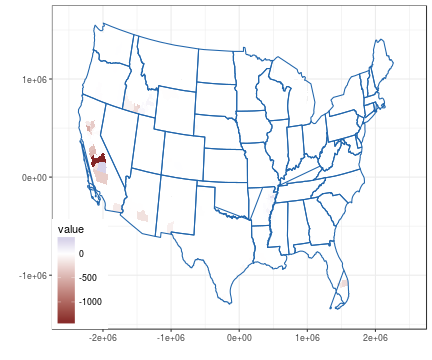

RCall.RObject{RCall.VecSxp}


In [14]:
mapdata(mean(f_ag,2))

In [19]:
mapdata(mean(100*f_ag/model[:WaterDemand,:totalirrigation],2))

LoadError: [91mMethodError: no method matching getindex(::Void, ::Symbol, ::Symbol)[39m

In [21]:
model[:WaterDemand, :industrialuse]

LoadError: [91mMethodError: no method matching getindex(::Void, ::Symbol, ::Symbol)[39m

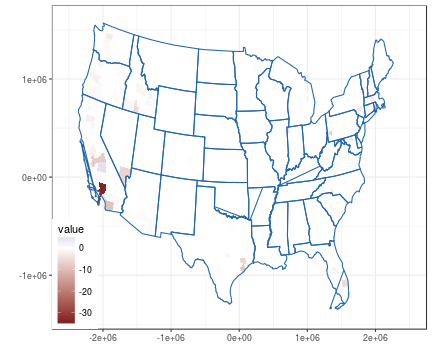

RCall.RObject{RCall.VecSxp}


In [15]:
mapdata(mean(f_do,2))

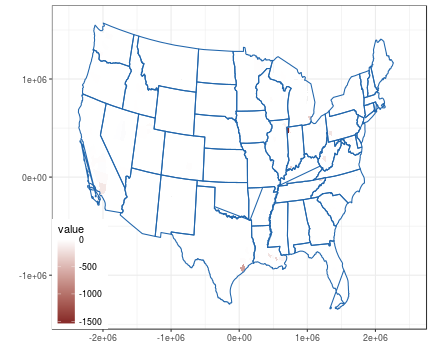

RCall.RObject{RCall.VecSxp}


In [16]:
mapdata(mean(f_in,2))